# **Install and Import Libraries**

In [1]:
pip install ucimlrepo

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

from ucimlrepo import fetch_ucirepo
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE, SelectKBest, chi2
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, RocCurveDisplay

# **Download and Load Data**

In [3]:
# fetch dataset
heart_disease = fetch_ucirepo(id=45)

# data (as pandas dataframes)
X = heart_disease.data.features
y = heart_disease.data.targets

# metadata
print(heart_disease.metadata)

# variable information
print(heart_disease.variables)


{'uci_id': 45, 'name': 'Heart Disease', 'repository_url': 'https://archive.ics.uci.edu/dataset/45/heart+disease', 'data_url': 'https://archive.ics.uci.edu/static/public/45/data.csv', 'abstract': '4 databases: Cleveland, Hungary, Switzerland, and the VA Long Beach', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 303, 'num_features': 13, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': ['Age', 'Sex'], 'target_col': ['num'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1989, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C52P4X', 'creators': ['Andras Janosi', 'William Steinbrunn', 'Matthias Pfisterer', 'Robert Detrano'], 'intro_paper': {'ID': 231, 'type': 'NATIVE', 'title': 'International application of a new probability algorithm for the diagnosis of coronary artery disease.', 'authors': 'R. Detrano, A. Jánosi, W. Steinbrunn, M

In [4]:
x = pd.DataFrame(X)
y = pd.DataFrame(y)

In [5]:
print(x.shape)
print(y.shape)

(303, 13)
(303, 1)


In [6]:
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0


In [7]:
y.head()

,num
0,0
1,2
2,1
3,0
4,0


In [8]:
print(x.info())
print("\n--------------------------------------------\n")
print(y.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
dtypes: float64(3), int64(10)
memory usage: 30.9 KB
None

--------------------------------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   num     303 non-null    int

In [9]:
x.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.438944,9.038662,29.0,48.0,56.0,61.0,77.0
sex,303.0,0.679868,0.467299,0.0,0.0,1.0,1.0,1.0
cp,303.0,3.158416,0.960126,1.0,3.0,3.0,4.0,4.0
trestbps,303.0,131.689769,17.599748,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.693069,51.776918,126.0,211.0,241.0,275.0,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.990099,0.994971,0.0,0.0,1.0,2.0,2.0
thalach,303.0,149.607261,22.875003,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [10]:
y.describe().T

,count,mean,std,min,25%,50%,75%,max
num,303.0,0.937294,1.228536,0.0,0.0,0.0,2.0,4.0


In [11]:
print("Unique values in y:")
print(y['num'].unique())

Unique values in y:
[0 2 1 3 4]


In [12]:
x.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [13]:
y.isnull().sum()

,0
num,0


# **Data Preprocessing & Cleaning**

## Filling Missing Values

In [14]:
x['ca'].fillna(x['ca'].median(), inplace=True)
x['thal'].fillna(x['thal'].median(), inplace=True)

/tmp/ipython-input-1956672582.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  x['ca'].fillna(x['ca'].median(), inplace=True)
/tmp/ipython-input-1956672582.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

> There are no categorical values



In [15]:
# Identify numerical columns (excluding the target if it was in X)
numerical_cols = x.select_dtypes(include=np.number).columns

# Initialize StandardScaler
scaler = StandardScaler()

# Apply StandardScaler to numerical columns
x[numerical_cols] = scaler.fit_transform(x[numerical_cols])

print("Numerical features standardized using StandardScaler.")

Numerical features standardized using StandardScaler.


# **EDA**

## Histograms

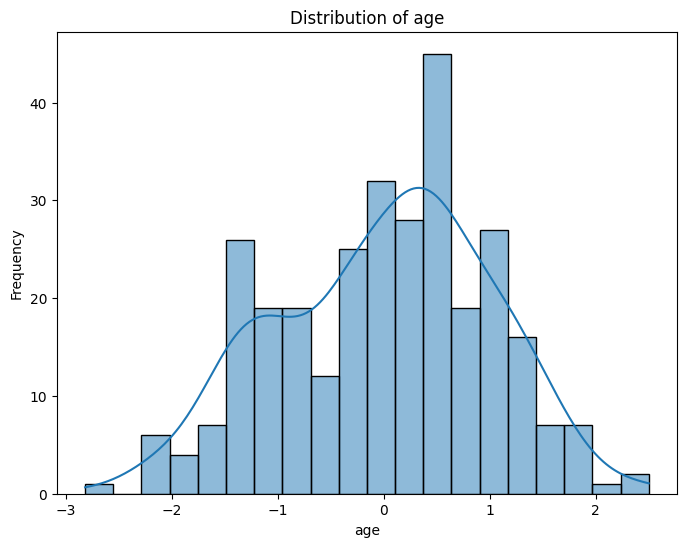

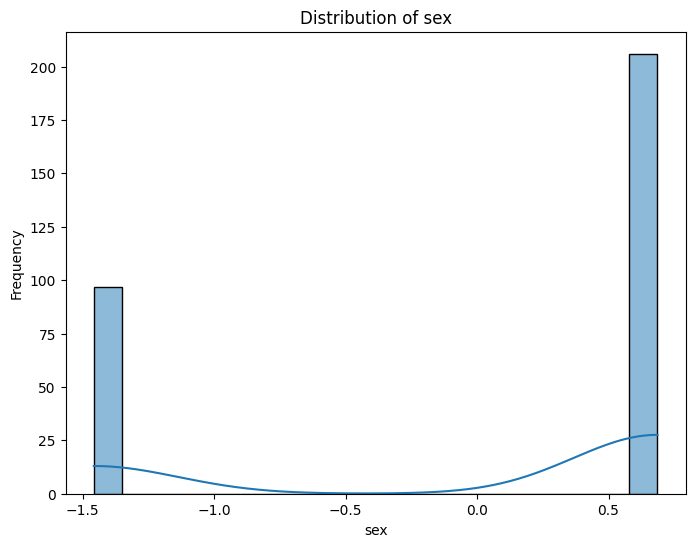

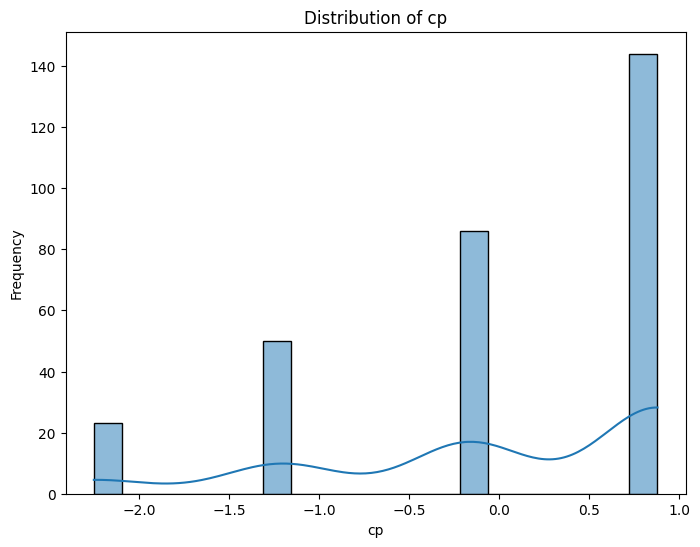

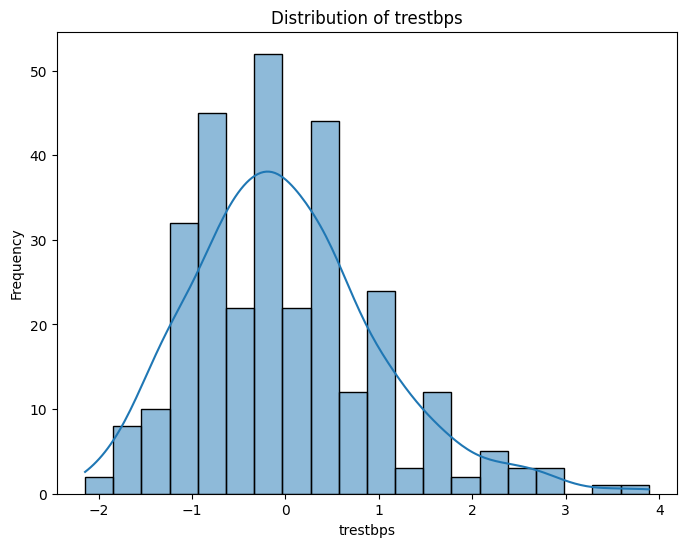

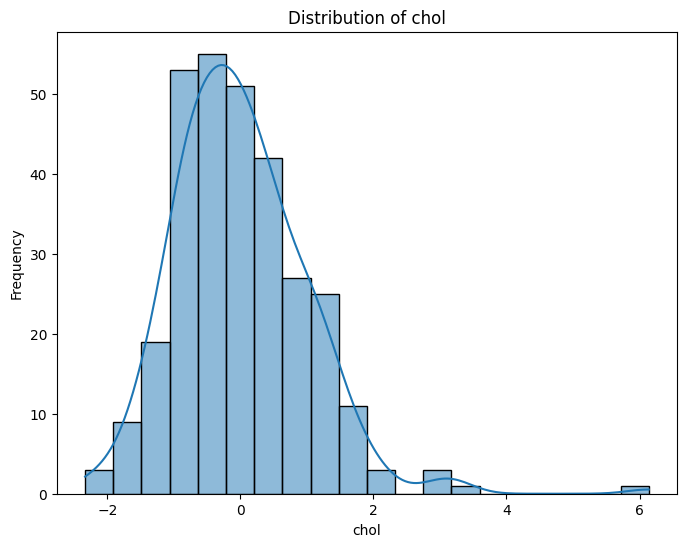

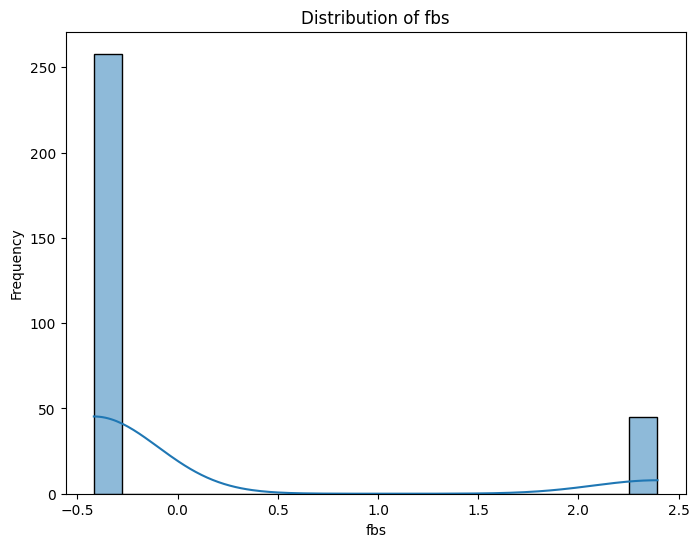

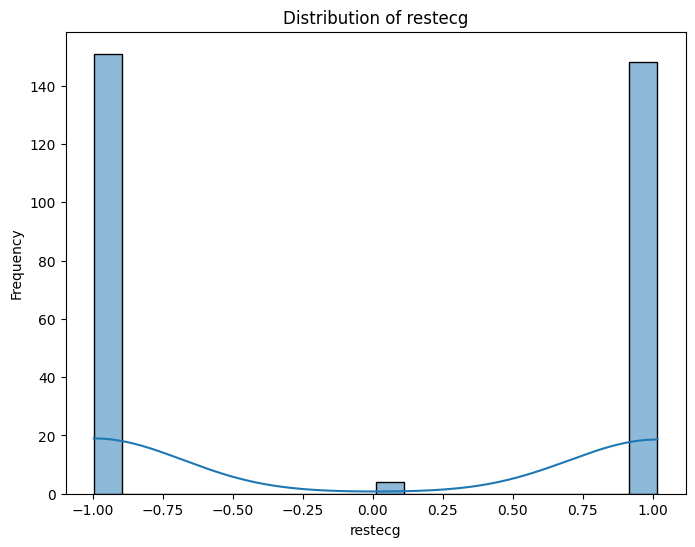

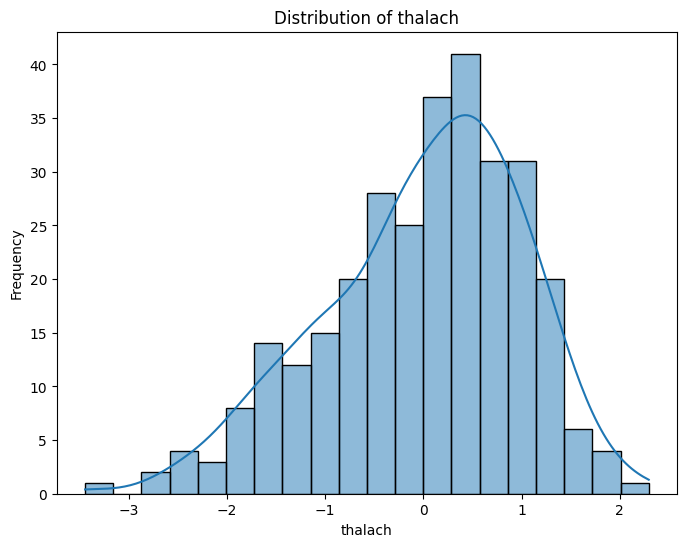

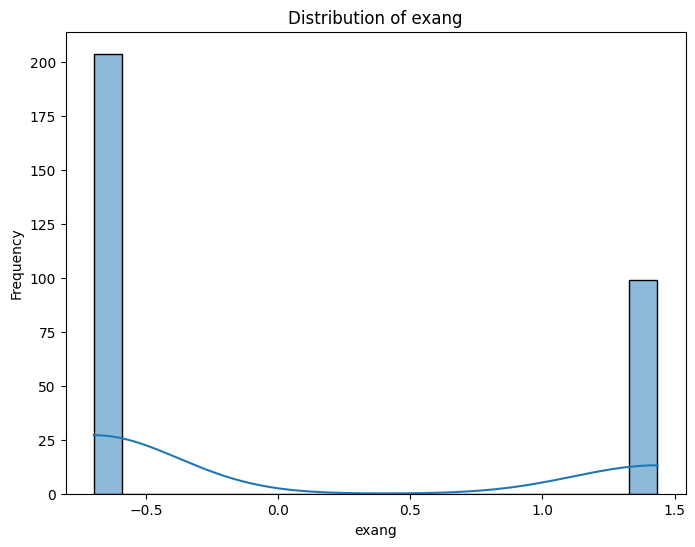

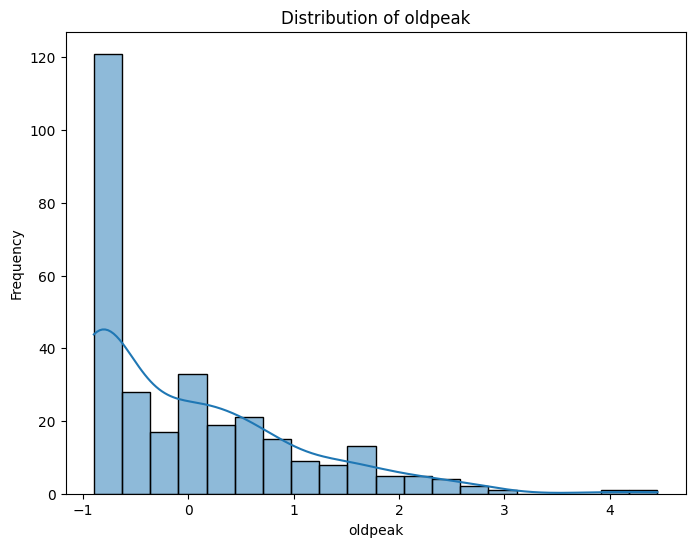

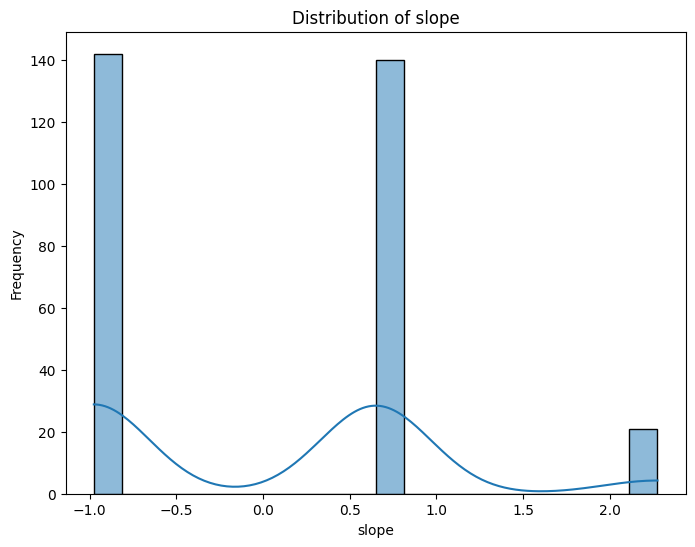

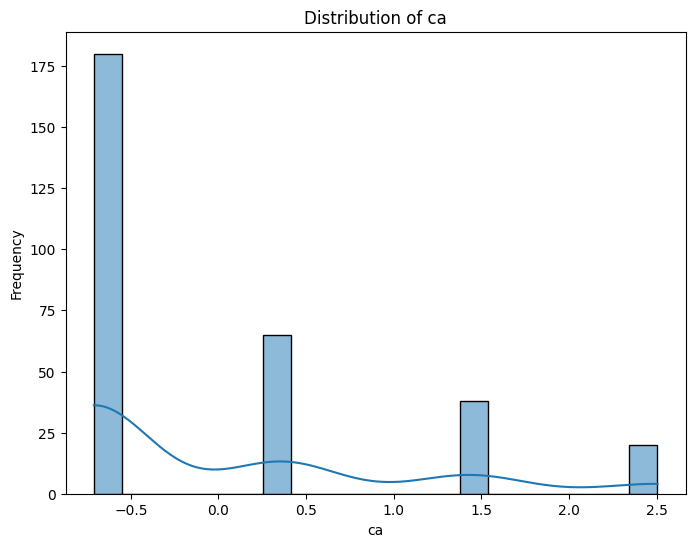

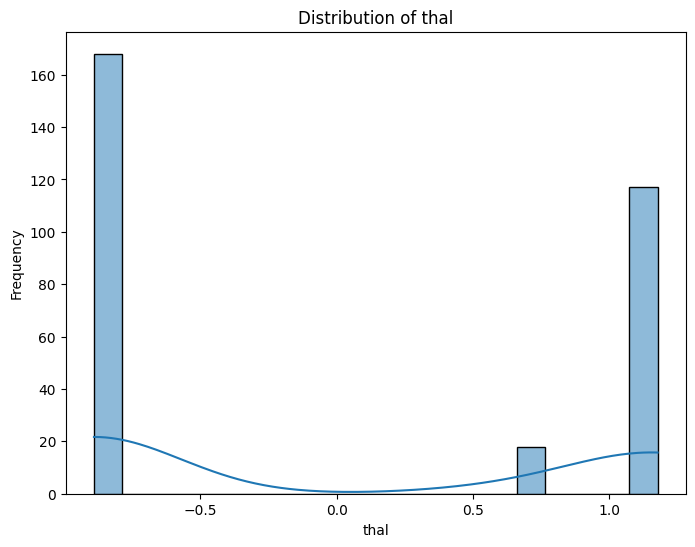

In [16]:
# Generate histograms for numerical features
for column in x.columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(x[column], bins=20, kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

## correlation heatmaps

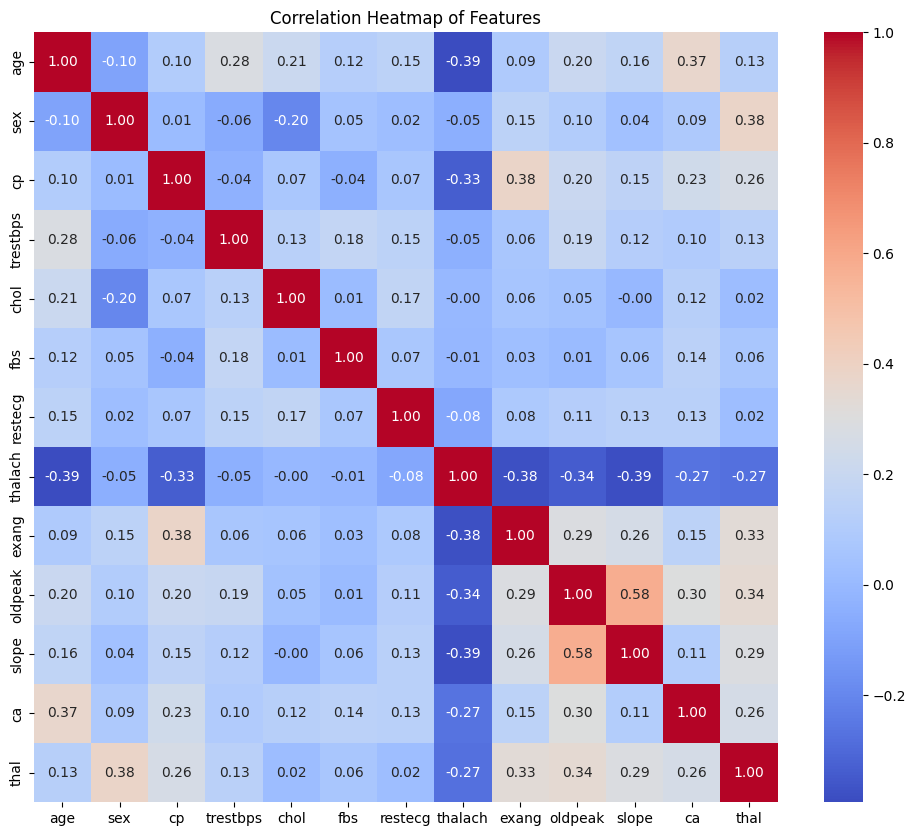

In [17]:
correlation_matrix = x.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Features')
plt.show()

## Boxplots

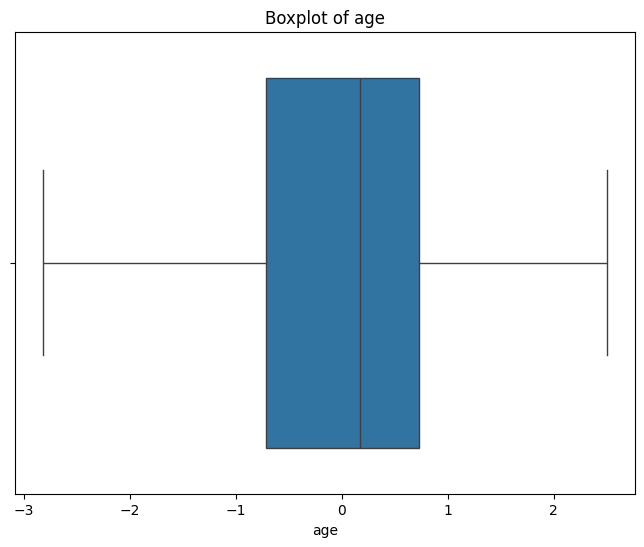

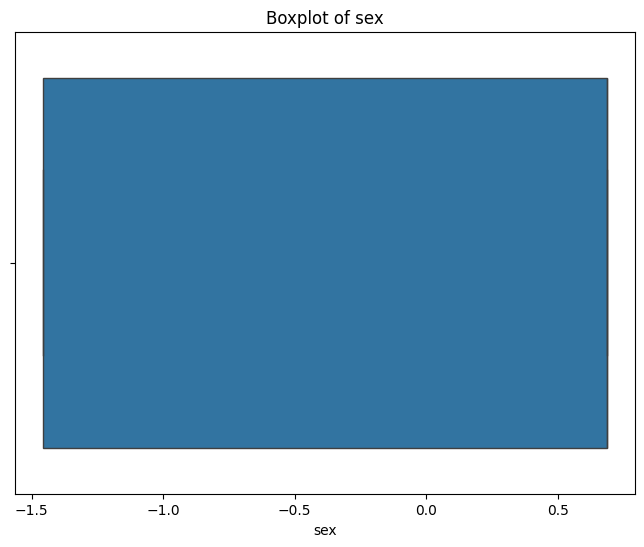

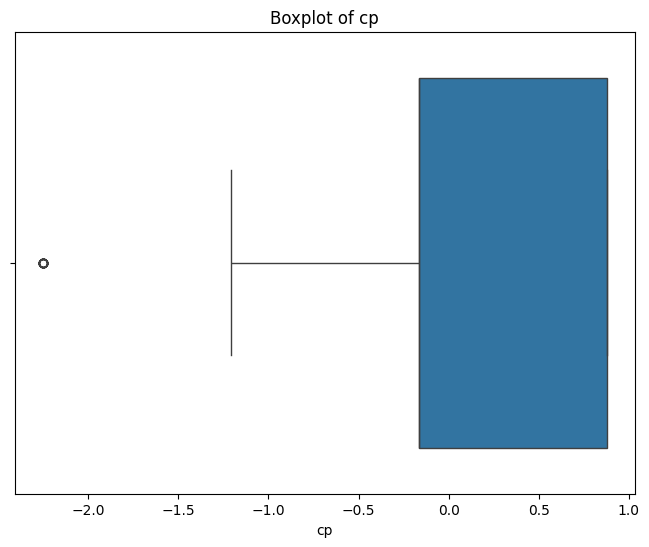

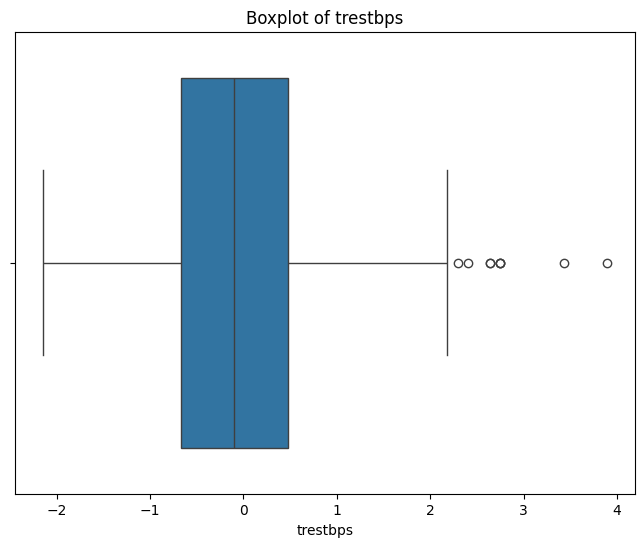

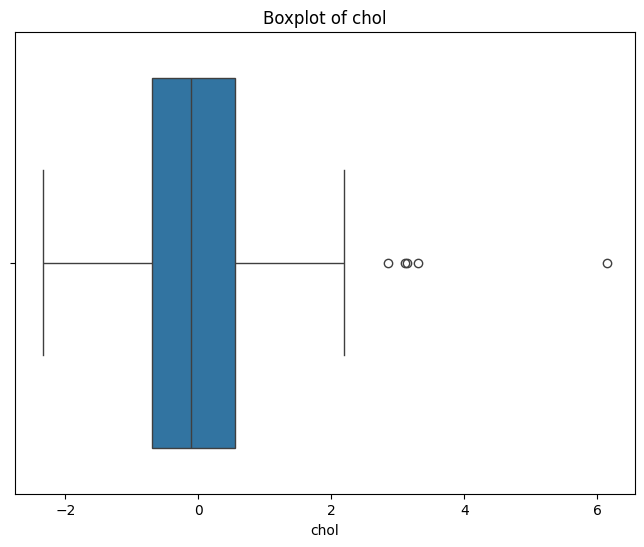

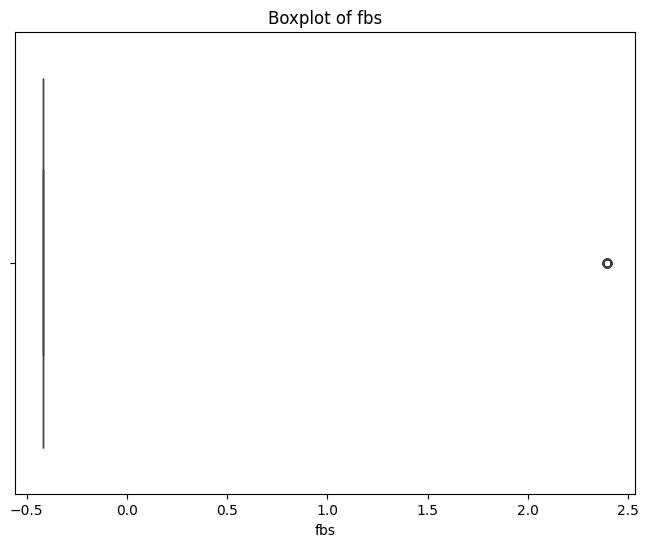

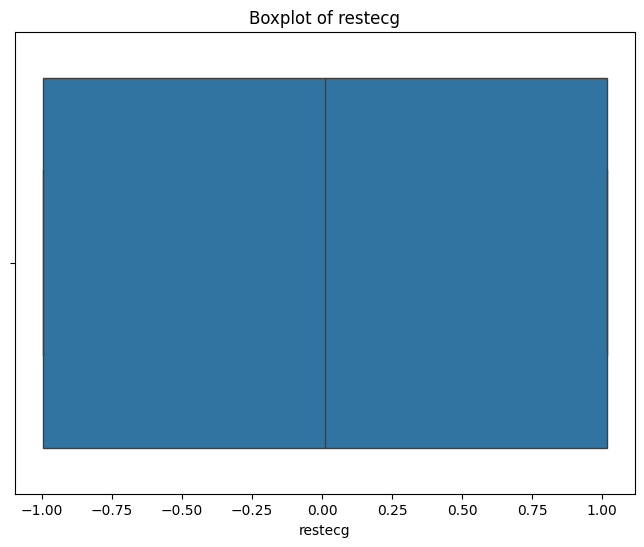

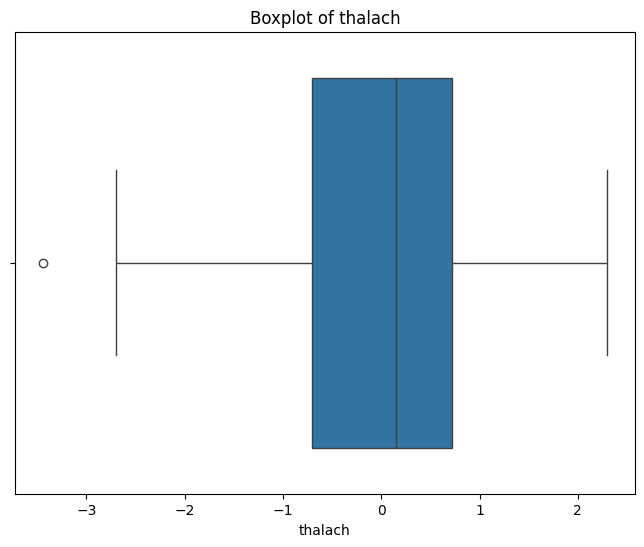

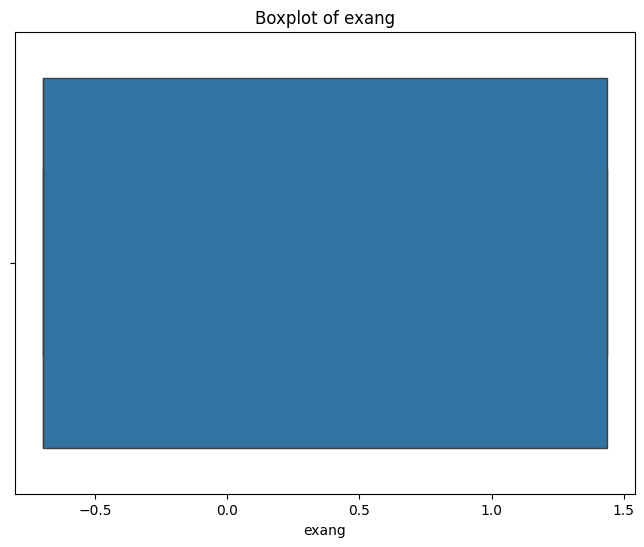

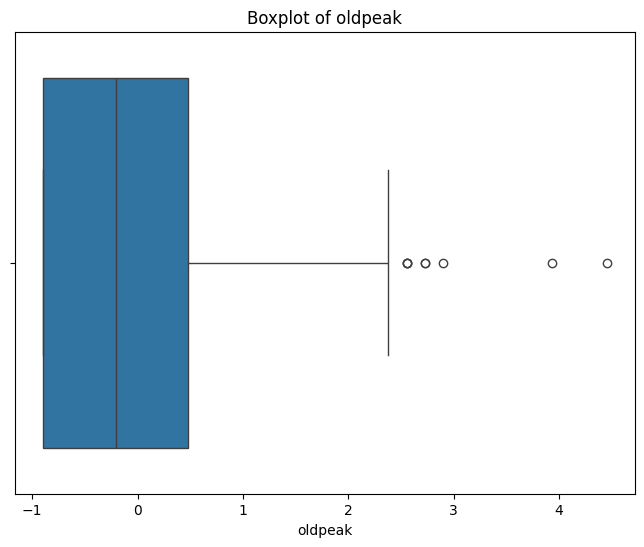

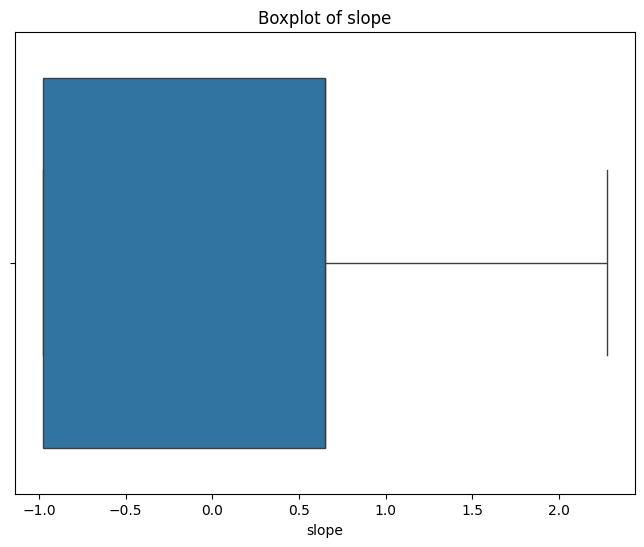

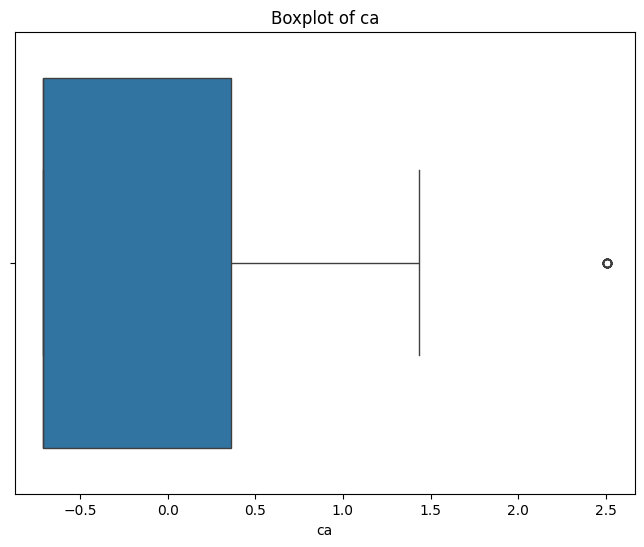

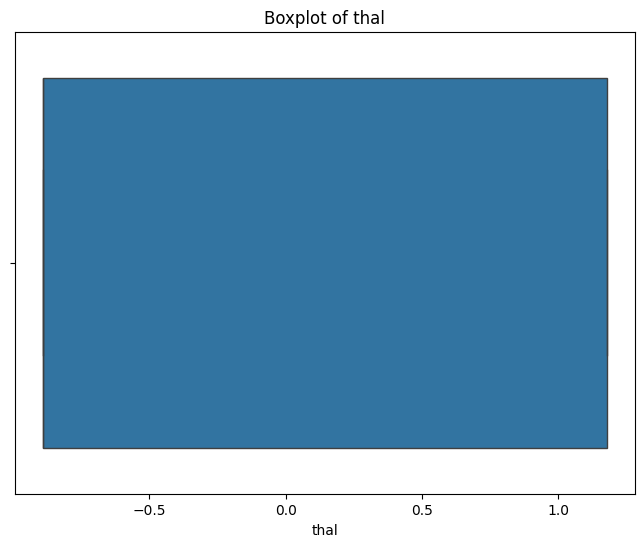

In [18]:
# Generate boxplots for numerical features
for column in x.columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=x[column])
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)
    plt.show()

# **Dimensionality Reduction - PCA**

## Apply PCA

In [19]:
pca = PCA()
x_pca = pca.fit_transform(x)

## optimal number of principal components

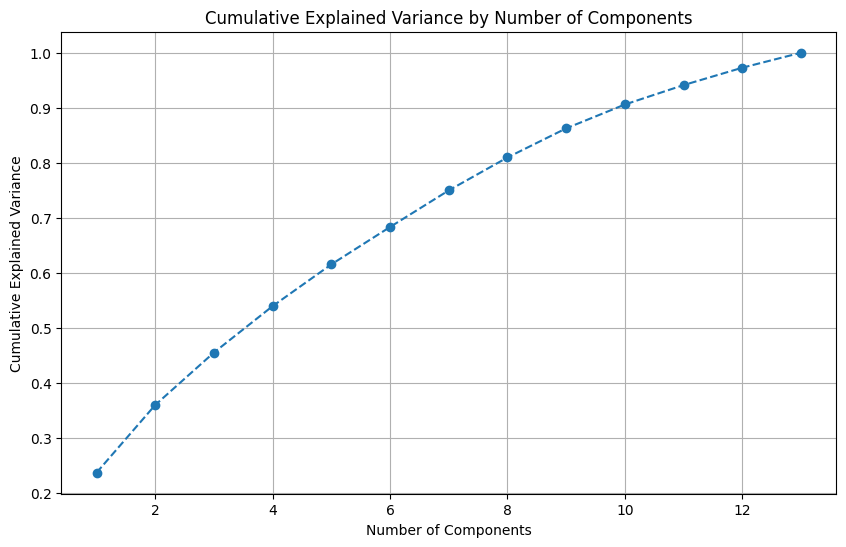

In [20]:
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.title('Cumulative Explained Variance by Number of Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

## scatter plot and cumulative variance plot


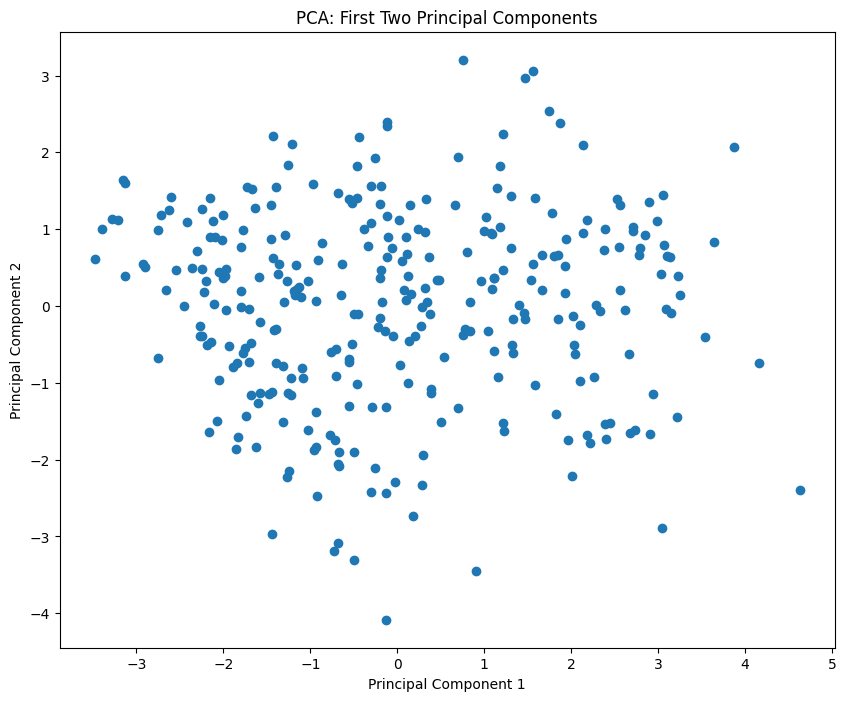

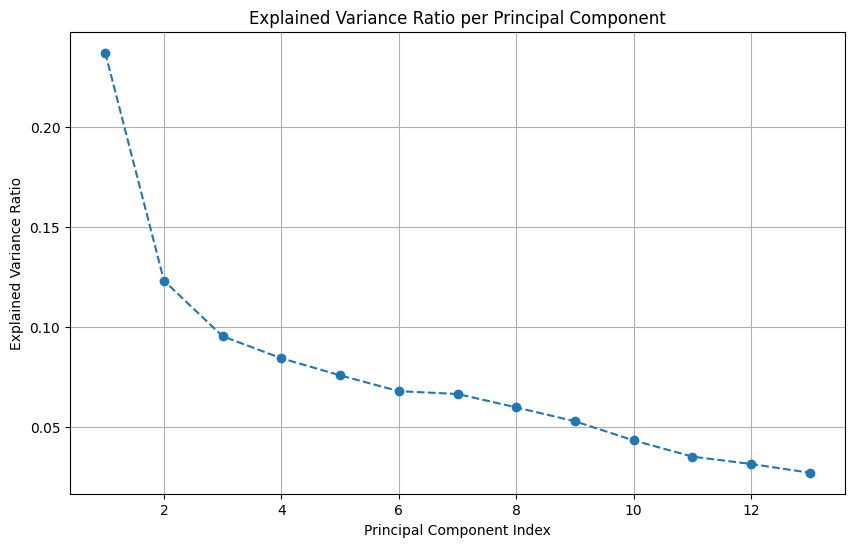

In [21]:
plt.figure(figsize=(10, 8))
plt.scatter(x_pca[:, 0], x_pca[:, 1])
plt.title('PCA: First Two Principal Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='--')
plt.title('Explained Variance Ratio per Principal Component')
plt.xlabel('Principal Component Index')
plt.ylabel('Explained Variance Ratio')
plt.grid(True)
plt.show()

# **Feature Selection**

## Feature importance



In [22]:
# Instantiate a RandomForestClassifier model
rf_model = RandomForestClassifier(random_state=42)

# Fit the Random Forest model to the data
rf_model.fit(x, y.values.ravel())

# Extract feature importances
feature_importances = rf_model.feature_importances_

# Create a pandas Series for feature importances
feature_importances_series = pd.Series(feature_importances, index=x.columns)

# Sort feature importances in descending order
sorted_feature_importances = feature_importances_series.sort_values(ascending=False)

# Print the sorted feature importances
print("Random Forest Feature Importances:")
print(sorted_feature_importances)

Random Forest Feature Importances:
thalach     0.138306
oldpeak     0.122138
chol        0.116422
age         0.113967
ca          0.097398
trestbps    0.091751
thal        0.077441
cp          0.075563
exang       0.047884
slope       0.042916
sex         0.028483
restecg     0.027269
fbs         0.020461
dtype: float64


## Recursive feature elimination (rfe)



In [23]:
# Instantiate a LogisticRegression model
log_reg = LogisticRegression(max_iter=1000, random_state=42)

# Instantiate an RFE object
# Selecting 7 features as an example, could be adjusted based on PCA or other methods
rfe = RFE(estimator=log_reg, n_features_to_select=7)

# Fit the RFE model
rfe.fit(x, y.values.ravel())

# Get the boolean mask of selected features
selected_features_mask = rfe.support_

# Get the names of the selected features
selected_features_rfe = x.columns[selected_features_mask]

# Print the names of the selected features
print("Selected Features using RFE:")
print(selected_features_rfe)

Selected Features using RFE:
Index(['cp', 'restecg', 'thalach', 'oldpeak', 'slope', 'ca', 'thal'], dtype='object')


## Chi-Square Test



In [24]:
# Use the original X data before standardization for chi2 test
# The original X data should be non-negative for categorical features.
# Re-fetch the original data to ensure no standardization is applied.
heart_disease_original = fetch_ucirepo(id=45)
x_original = heart_disease_original.data.features
y_original = heart_disease_original.data.targets

# Fill missing values in original data for 'ca' and 'thal' before chi2 test
x_original['ca'].fillna(x_original['ca'].median(), inplace=True)
x_original['thal'].fillna(x_original['thal'].median(), inplace=True)


# Identify categorical features
categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

print("Chi-Square Test Results (using original non-negative data):")

for col in categorical_features:
    # Ensure the feature column is treated as categorical and handle potential NaNs by dropping for chi2 test
    # chi2 does not handle NaN values. Assuming imputed data is suitable for chi2.
    # The target variable y is already checked and has no missing values.
    chi_statistic, p_value = chi2(x_original[[col]], y_original)
    print(f"Feature: {col}")
    print(f"  Chi-Square Statistic: {chi_statistic[0]:.4f}")
    print(f"  P-value: {p_value[0]:.4f}")
    print("-" * 30)

Chi-Square Test Results (using original non-negative data):
Feature: sex
  Chi-Square Statistic: 7.4992
  P-value: 0.1117
------------------------------
Feature: cp
  Chi-Square Statistic: 16.8812
  P-value: 0.0020
------------------------------
Feature: fbs
  Chi-Square Statistic: 6.6582
  P-value: 0.1551
------------------------------
Feature: restecg
  Chi-Square Statistic: 14.0575
  P-value: 0.0071
------------------------------
Feature: exang
  Chi-Square Statistic: 41.5345
  P-value: 0.0000
------------------------------
Feature: slope
  Chi-Square Statistic: 10.5422
  P-value: 0.0322
------------------------------
Feature: ca
  Chi-Square Statistic: 109.8669
  P-value: 0.0000
------------------------------
Feature: thal
  Chi-Square Statistic: 70.2947
  P-value: 0.0000
------------------------------


/tmp/ipython-input-941231595.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  x_original['ca'].fillna(x_original['ca'].median(), inplace=True)
/tmp/ipython-input-941231595.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_original['ca'].fillna(x_original['ca'].median(), inplace=True)
/tmp/ipython-input-941231595.py:10: FutureWarning: A 

## Select relevant features

In [25]:

# Based on the analysis, selecting features that show up as important across methods and are statistically significant (for categorical):
selected_features = [
    'thalach',   # High RF importance, selected by RFE, categorical & significant chi2
    'oldpeak',   # High RF importance, selected by RFE, numerical
    'ca',        # High RF importance, selected by RFE, categorical & significant chi2
    'thal',      # Moderate RF importance, selected by RFE, categorical & significant chi2
    'cp',        # Moderate RF importance, selected by RFE, categorical & significant chi2
    'slope',     # Lower RF importance, selected by RFE, categorical & significant chi2
    'age',       # High RF importance, numerical
    'chol',      # High RF importance, numerical
    'trestbps',  # Moderate RF importance, numerical
    'sex',       # Significant chi2, lower RF importance, not in RFE (example selection based on significance)
    'exang',     # Significant chi2, lower RF importance, not in RFE (example selection based on significance)
    'restecg'    # Significant chi2, lower RF importance, selected by RFE (example selection based on significance)

]

# Removing 'fbs' as it was not significant in the Chi-Square test and had low RF importance.

print("Selected Features for Modeling:")
print(selected_features)

# Create a new DataFrame with selected features (optional, but good practice for the next step)
x_selected = x[selected_features]
print("\nShape of the new DataFrame with selected features:", x_selected.shape)
display(x_selected.head())


Selected Features for Modeling:
['thalach', 'oldpeak', 'ca', 'thal', 'cp', 'slope', 'age', 'chol', 'trestbps', 'sex', 'exang', 'restecg']

Shape of the new DataFrame with selected features: (303, 12)


,thalach,oldpeak,ca,thal,cp,slope,age,chol,trestbps,sex,exang,restecg
0,0.017197,1.087338,-0.711131,0.660004,-2.251775,2.274579,0.948726,-0.264900,0.757525,0.686202,-0.696631,1.016684
1,-1.821905,0.397182,2.504881,-0.890238,0.877985,0.649113,1.392002,0.760415,1.611220,0.686202,1.435481,1.016684
2,-0.902354,1.346147,1.432877,1.176752,0.877985,0.649113,1.392002,-0.342283,-0.665300,0.686202,1.435481,1.016684
3,1.637359,2.122573,-0.711131,-0.890238,-0.165268,2.274579,-1.932564,0.063974,-0.096170,0.686202,-0.696631,-0.996749
4,0.980537,0.310912,-0.711131,-0.890238,-1.208521,-0.976352,-1.489288,-0.825922,-0.096170,-1.457296,-0.696631,1.016684


# **Supervised Learning - Classification Model**

## Data Split


In [26]:
X_train, X_test, y_train, y_test = train_test_split(x_selected, y, test_size=0.2, random_state=42)

print("Shape of training data (X_train):", X_train.shape)
print("Shape of testing data (X_test):", X_test.shape)
print("Shape of training labels (y_train):", y_train.shape)
print("Shape of testing labels (y_test):", y_test.shape)

Shape of training data (X_train): (242, 12)
Shape of testing data (X_test): (61, 12)
Shape of training labels (y_train): (242, 1)
Shape of testing labels (y_test): (61, 1)


## Model Train

In [27]:
# Instantiate models
log_reg_model = LogisticRegression(max_iter=1000, random_state=42)
dt_model = DecisionTreeClassifier(random_state=42)
rf_model = RandomForestClassifier(random_state=42)
svm_model = SVC(probability=True, random_state=42)

# Fit models to the training data
log_reg_model.fit(X_train, y_train.values.ravel())
dt_model.fit(X_train, y_train.values.ravel())
rf_model.fit(X_train, y_train.values.ravel())
svm_model.fit(X_train, y_train.values.ravel())

print("Logistic Regression model trained.")
print("Decision Tree model trained.")
print("Random Forest model trained.")
print("SVM model trained.")

Logistic Regression model trained.
Decision Tree model trained.
Random Forest model trained.
SVM model trained.


## Model Evaluation


In [28]:
models = {
    'Logistic Regression': log_reg_model,
    'Decision Tree': dt_model,
    'Random Forest': rf_model,
    'SVM': svm_model
}

Evaluating Logistic Regression:
  Accuracy: 0.5738
  Precision: 0.5359
  Recall: 0.5738
  F1-score: 0.5505


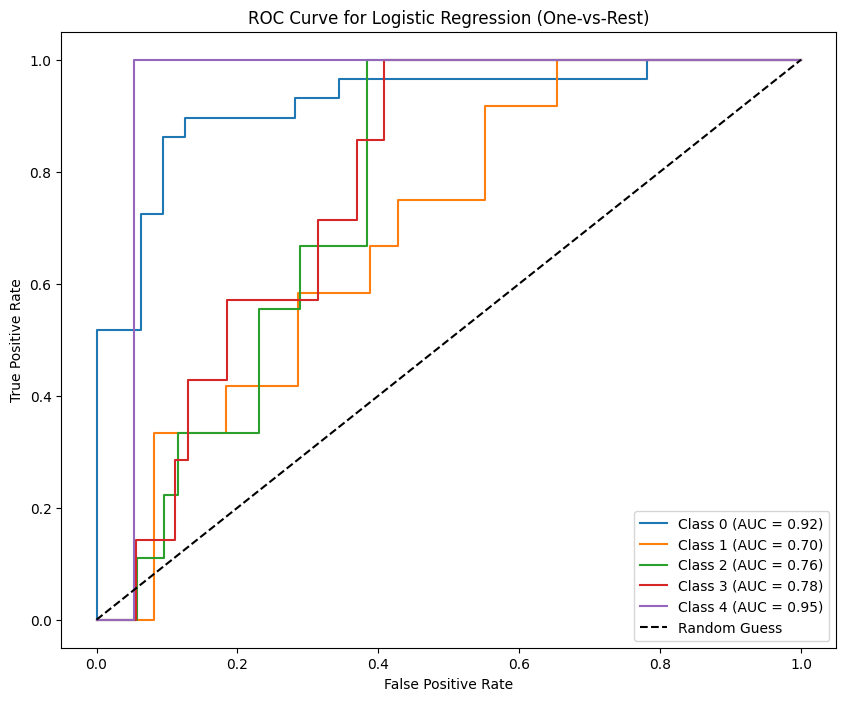

  AUC (One-vs-Rest Average): 0.8196
--------------------------------------------------
Evaluating Decision Tree:
  Accuracy: 0.4590
  Precision: 0.4540
  Recall: 0.4590
  F1-score: 0.4564


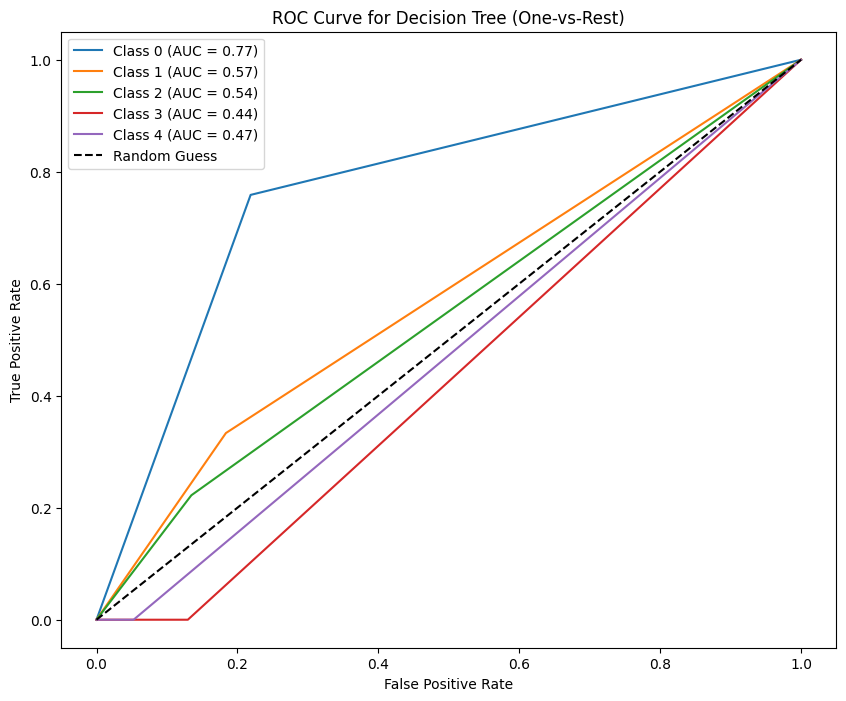

  AUC (One-vs-Rest Average): 0.5595
--------------------------------------------------
Evaluating Random Forest:
  Accuracy: 0.5246
  Precision: 0.4177
  Recall: 0.5246
  F1-score: 0.4594


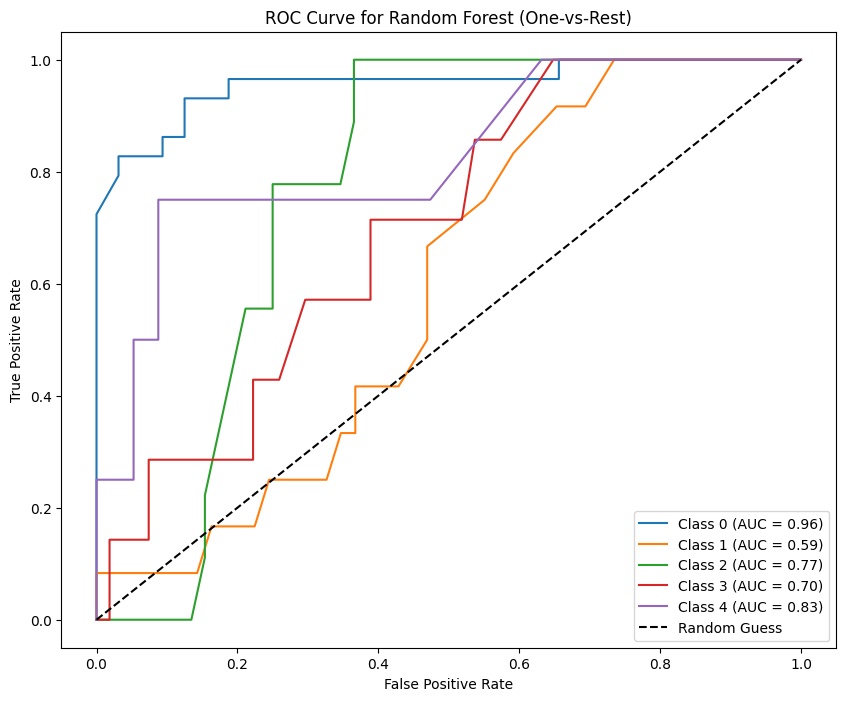

  AUC (One-vs-Rest Average): 0.7686
--------------------------------------------------
Evaluating SVM:
  Accuracy: 0.5246
  Precision: 0.4336
  Recall: 0.5246
  F1-score: 0.4621


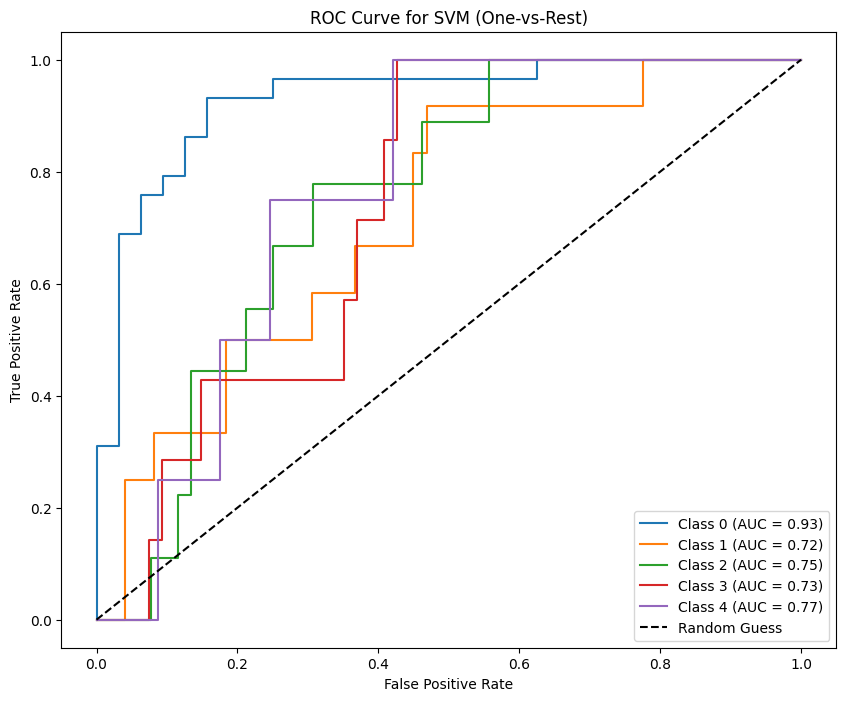

  AUC (One-vs-Rest Average): 0.7798
--------------------------------------------------


In [29]:
for name, model in models.items():
    print(f"Evaluating {name}:")

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate and print metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

    print(f"  Accuracy: {accuracy:.4f}")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall: {recall:.4f}")
    print(f"  F1-score: {f1:.4f}")

    # Calculate and plot ROC curve and AUC
    # For multi-class, we need to handle probabilities for each class
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)
        # Assuming a one-vs-rest approach for multi-class ROC
        # Need to binarize the output for ROC curve calculation for each class
        from sklearn.preprocessing import label_binarize
        y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
        n_classes = y_test_bin.shape[1]

        plt.figure(figsize=(10, 8))
        for i in range(n_classes):
            fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
            roc_auc = auc(fpr, tpr)
            plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')

        plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'ROC Curve for {name} (One-vs-Rest)')
        plt.legend()
        plt.show()
        print(f"  AUC (One-vs-Rest Average): {np.mean([auc(roc_curve(y_test_bin[:, i], y_prob[:, i])[0], roc_curve(y_test_bin[:, i], y_prob[:, i])[1]) for i in range(n_classes)]):.4f}") # Calculate average AUC
    else:
        print("  ROC Curve and AUC not available for this model (no predict_proba).")

    print("-" * 50)

## **Unsupervised Learning - Clustering**

## k-means clustering




In [30]:
from sklearn.cluster import KMeans

# Instantiate a KMeans object with an arbitrary number of clusters (e.g., 3)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)

# Fit the KMeans model to the x_selected DataFrame
kmeans.fit(x_selected)

# Get the cluster labels
kmeans_labels = kmeans.labels_

print("KMeans clustering applied.")

KMeans clustering applied.


## Determine optimal k by using the elbow method


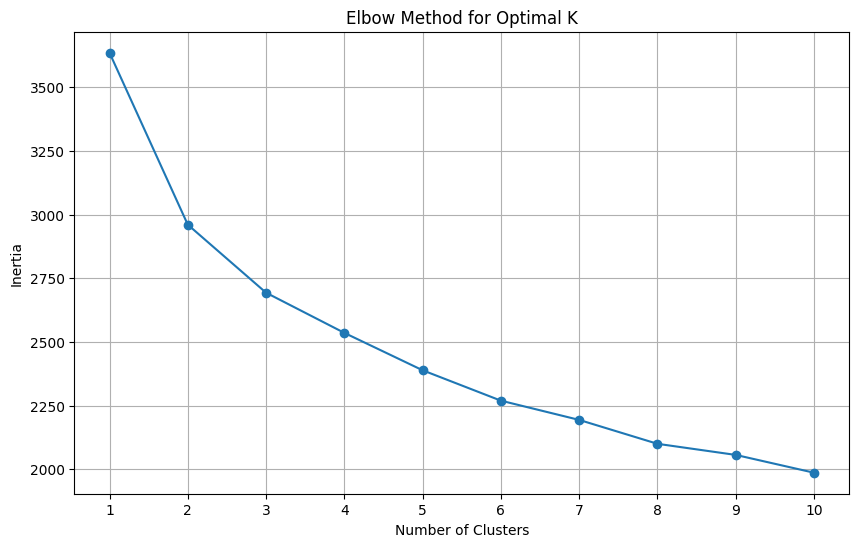

In [31]:
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(x_selected)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.xticks(k_range)
plt.grid(True)
plt.show()

## Hierarchical Clustering

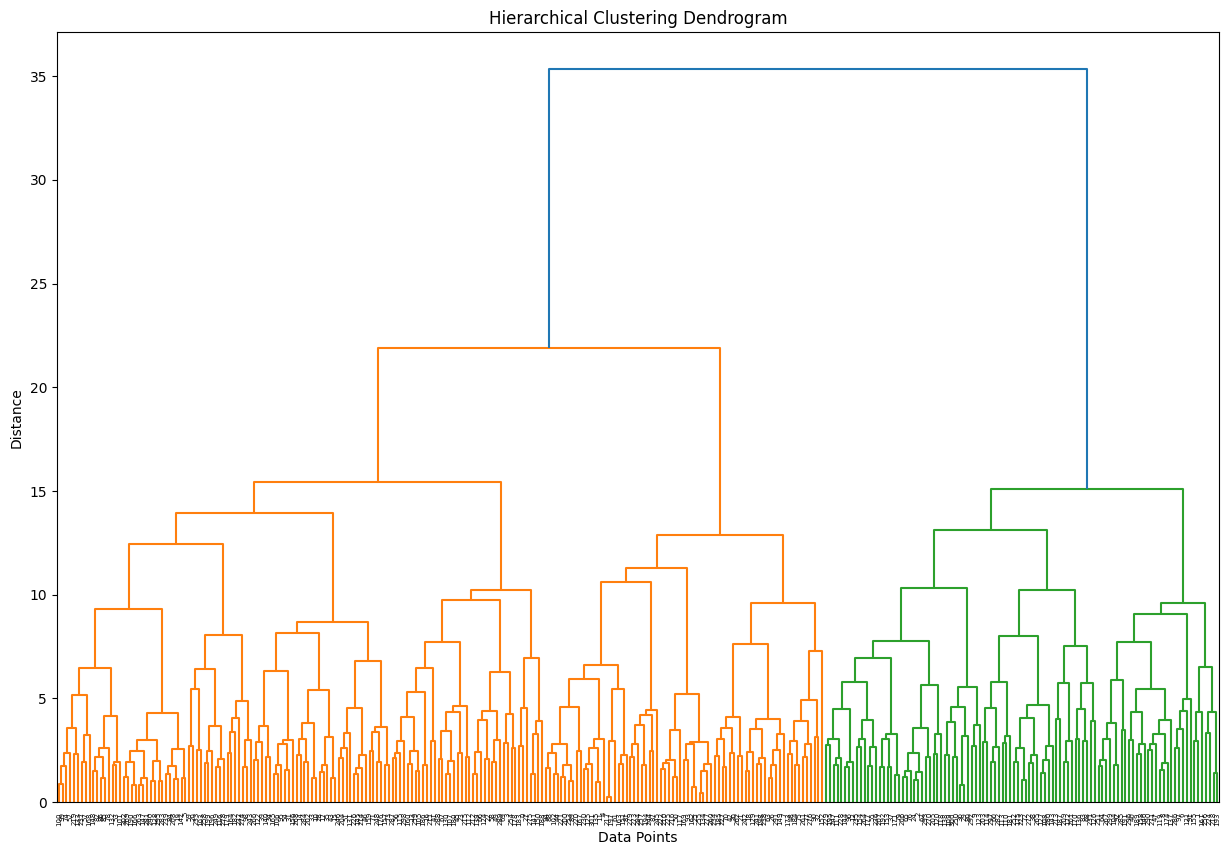

In [32]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Perform hierarchical clustering
linked = linkage(x_selected, method='ward')

# Create a figure and axes for the dendrogram
plt.figure(figsize=(15, 10))
ax = plt.subplot(111)

# Generate the dendrogram
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True, ax=ax)

# Add title and labels
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Distance')

# Display the dendrogram plot
plt.show()

## Compare clusters with labels


In [33]:
from scipy.cluster.hierarchy import fcluster

# Add K-Means cluster labels to the DataFrame
x_selected['kmeans_cluster'] = kmeans_labels

# Add actual heart disease labels to the DataFrame
x_selected['actual_label'] = y['num']

# Create cross-tabulation for K-Means clusters vs. actual labels
kmeans_crosstab = pd.crosstab(x_selected['kmeans_cluster'], x_selected['actual_label'])

print("Cross-tabulation of K-Means Clusters and Actual Heart Disease Labels:")
display(kmeans_crosstab)

# Determine a potential number of clusters from the dendrogram (e.g., 3 or 4 based on visual inspection)
# For this example, let's choose 3 clusters, matching the initial KMeans
n_clusters_h = 3

# Apply fcluster to get flat cluster assignments for hierarchical clustering
hierarchical_labels = fcluster(linked, n_clusters_h, criterion='maxclust')

# Add hierarchical cluster labels to the DataFrame
x_selected['hcluster_label'] = hierarchical_labels

# Create cross-tabulation for Hierarchical clusters vs. actual labels
hcluster_crosstab = pd.crosstab(x_selected['hcluster_label'], x_selected['actual_label'])

print("\nCross-tabulation of Hierarchical Clusters and Actual Heart Disease Labels:")
display(hcluster_crosstab)

Cross-tabulation of K-Means Clusters and Actual Heart Disease Labels:


actual_label,0,1,2,3,4
kmeans_cluster,,,,,
0,72,7,0,1,0
1,9,20,30,31,12
2,83,28,6,3,1



Cross-tabulation of Hierarchical Clusters and Actual Heart Disease Labels:


actual_label,0,1,2,3,4
hcluster_label,,,,,
1,11,23,28,30,11
2,66,5,1,1,0
3,87,27,7,4,2


# **Hyperparameter Tuning**

## Define parameter grids

In [34]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from scipy.stats import uniform, randint

# Define parameter grids for GridSearchCV
param_grids = {
    'Logistic Regression': {
        'C': [0.001, 0.01, 0.1, 1, 10, 100],
        'penalty': ['l1', 'l2', 'elasticnet', 'none'],
        'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
    },
    'Decision Tree': {
        'max_depth': [None, 5, 10, 20],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'criterion': ['gini', 'entropy']
    },
    'Random Forest': {
        'n_estimators': [100, 200, 500],
        'max_depth': [None, 5, 10, 20],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'criterion': ['gini', 'entropy']
    },
    'SVM': {
        'C': [0.1, 1, 10, 100],
        'gamma': ['scale', 'auto'],
        'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
    }
}

# Define parameter distributions for RandomizedSearchCV
param_distributions = {
    'Logistic Regression': {
        'C': uniform(loc=0, scale=100),
        'penalty': ['l1', 'l2', 'elasticnet', 'none'],
        'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
    },
    'Decision Tree': {
        'max_depth': [None] + list(randint(1, 20).rvs(size=5)), # Include None and sample integers
        'min_samples_split': randint(2, 11),
        'min_samples_leaf': randint(1, 5),
        'criterion': ['gini', 'entropy']
    },
    'Random Forest': {
        'n_estimators': randint(100, 501),
        'max_depth': [None] + list(randint(1, 20).rvs(size=5)), # Include None and sample integers
        'min_samples_split': randint(2, 11),
        'min_samples_leaf': randint(1, 5),
        'criterion': ['gini', 'entropy']
    },
    'SVM': {
        'C': uniform(loc=0.1, scale=100),
        'gamma': ['scale', 'auto'],
        'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
    }
}

print("Parameter grids and distributions defined.")

Parameter grids and distributions defined.


## Apply randomizedsearchcv

In [35]:
tuned_models_rs = {}

for name, model in models.items():
    print(f"Applying RandomizedSearchCV for {name}...")
    # Retrieve parameter distribution
    param_dist = param_distributions[name]

    # Check for incompatible solvers with penalty for Logistic Regression
    if name == 'Logistic Regression':
        if 'penalty' in param_dist and 'solver' in param_dist:
            # Define valid combinations of solver and penalty
            valid_params = []
            for penalty in param_dist['penalty']:
                for solver in param_dist['solver']:
                    # Add valid solver-penalty pairs
                    if penalty in ['l2', 'none'] and solver in ['newton-cg', 'lbfgs', 'sag']:
                        valid_params.append({'penalty': [penalty], 'solver': [solver]})
                    elif penalty == 'l1' and solver in ['liblinear', 'saga']:
                         valid_params.append({'penalty': [penalty], 'solver': [solver]})
                    elif penalty == 'elasticnet' and solver in ['saga']:
                         valid_params.append({'penalty': [penalty], 'solver': [solver]})
                    elif penalty == 'none' and solver in ['liblinear']: # liblinear does not support no penalty
                         continue
            # Use a list of dictionaries for param_distributions
            param_dist_adjusted = valid_params
            # Add C distribution to each valid combination
            for param_set in param_dist_adjusted:
                param_set['C'] = param_dist['C'] # Use the same C distribution
            param_dist_to_use = param_dist_adjusted
        else:
            param_dist_to_use = param_dist
    elif name == 'SVM':
         # Need to handle potential 'kernel' values if gamma='auto' for SVM
        if 'gamma' in param_dist and 'kernel' in param_dist:
            valid_params = []
            for kernel in param_dist['kernel']:
                for gamma in param_dist['gamma']:
                    if kernel != 'linear':
                        valid_params.append({'kernel': [kernel], 'gamma': [gamma]})
                    elif kernel == 'linear' and gamma == 'scale': # Linear kernel with gamma='auto' is not relevant
                         valid_params.append({'kernel': [kernel], 'gamma': [gamma]})
            param_dist_adjusted = valid_params
            for param_set in param_dist_adjusted:
                param_set['C'] = param_dist['C'] # Use the same C distribution
            param_dist_to_use = param_dist_adjusted
        else:
            param_dist_to_use = param_dist
    else:
        param_dist_to_use = param_dist


    # Create RandomizedSearchCV object
    random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist_to_use,
                                       n_iter=50, cv=5, random_state=42, n_jobs=-1, scoring='accuracy')

    # Fit RandomizedSearchCV
    # y_train needs to be ravelled as it's a DataFrame
    random_search.fit(X_train, y_train.values.ravel())

    # Store the best estimator
    tuned_models_rs[name] = random_search.best_estimator_

    print(f"RandomizedSearchCV for {name} completed.")
    print(f"Best parameters for {name}: {random_search.best_params_}")
    print(f"Best cross-validation score for {name}: {random_search.best_score_:.4f}")
    print("-" * 50)

print("RandomizedSearchCV completed for all models.")

Applying RandomizedSearchCV for Logistic Regression...


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
145 fits failed out of a total of 250.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
41 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.12/dist-packages/sklearn/utils

RandomizedSearchCV for Logistic Regression completed.
Best parameters for Logistic Regression: {'C': np.float64(1.5636406741193931), 'penalty': 'l1', 'solver': 'liblinear'}
Best cross-validation score for Logistic Regression: 0.5991
--------------------------------------------------
Applying RandomizedSearchCV for Decision Tree...
RandomizedSearchCV for Decision Tree completed.
Best parameters for Decision Tree: {'criterion': 'entropy', 'max_depth': np.int64(3), 'min_samples_leaf': 4, 'min_samples_split': 4}
Best cross-validation score for Decision Tree: 0.5867
--------------------------------------------------
Applying RandomizedSearchCV for Random Forest...
RandomizedSearchCV for Random Forest completed.
Best parameters for Random Forest: {'criterion': 'gini', 'max_depth': np.int64(14), 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 104}
Best cross-validation score for Random Forest: 0.6279
--------------------------------------------------
Applying RandomizedSearchCV

## Evaluate optimized models


Evaluating Tuned Logistic Regression:
  Accuracy: 0.5574
  Precision: 0.4989
  Recall: 0.5574
  F1-score: 0.5143


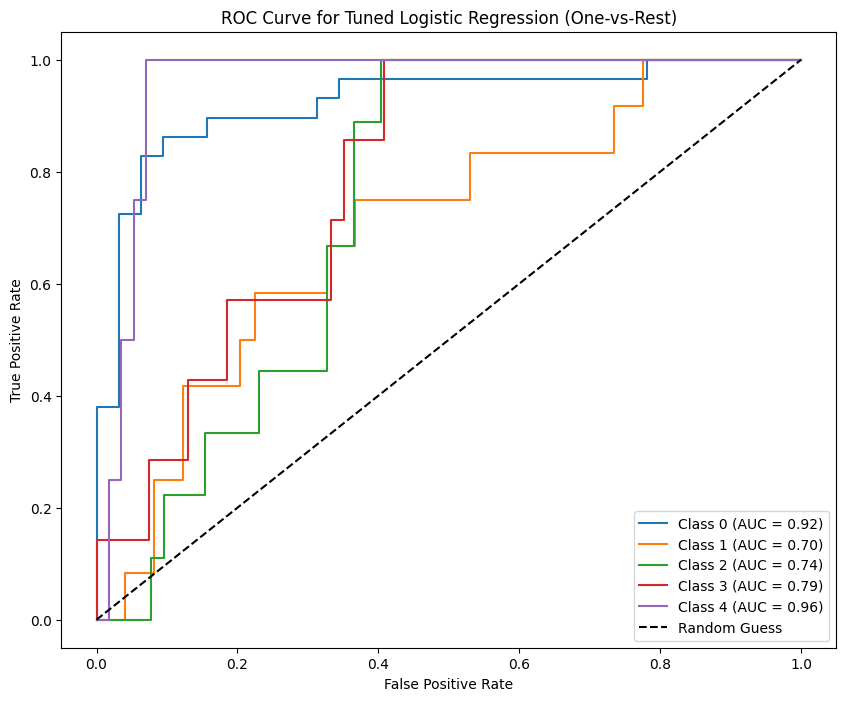

  AUC (One-vs-Rest Average): 0.8215
--------------------------------------------------
Evaluating Tuned Decision Tree:
  Accuracy: 0.5738
  Precision: 0.5323
  Recall: 0.5738
  F1-score: 0.5484


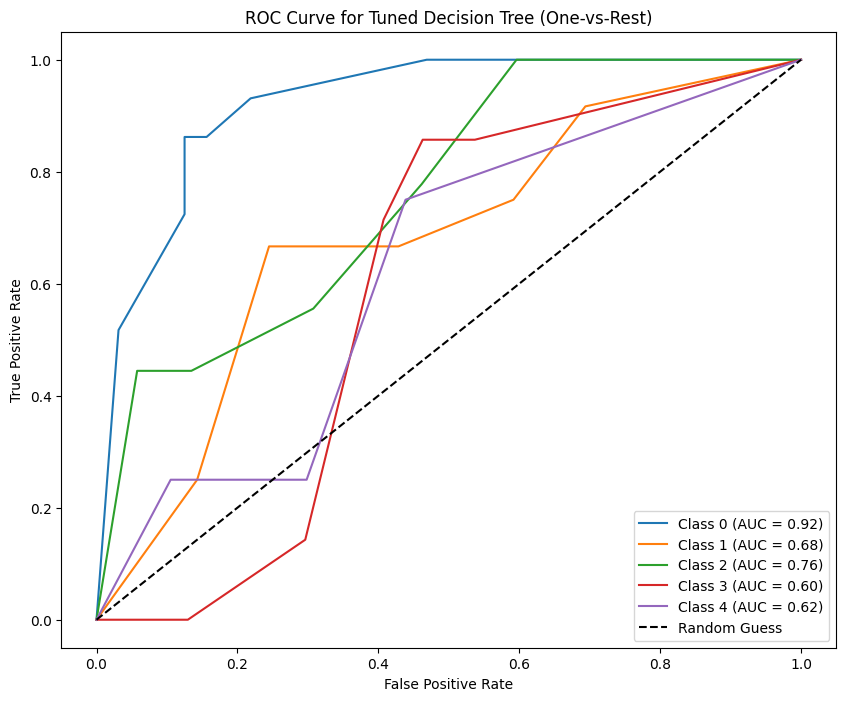

  AUC (One-vs-Rest Average): 0.7164
--------------------------------------------------
Evaluating Tuned Random Forest:
  Accuracy: 0.5082
  Precision: 0.3995
  Recall: 0.5082
  F1-score: 0.4375


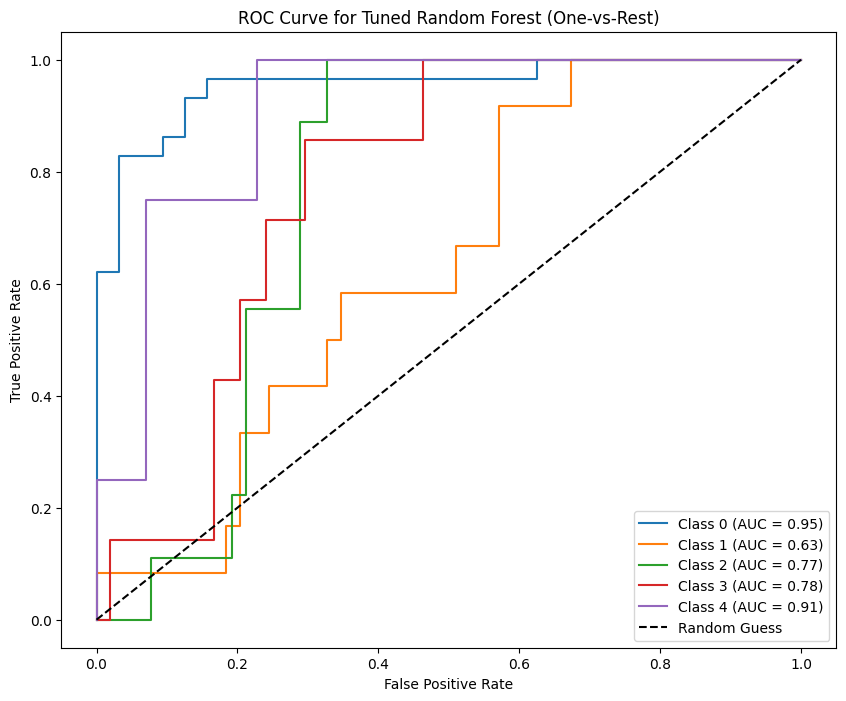

  AUC (One-vs-Rest Average): 0.8080
--------------------------------------------------
Evaluating Tuned SVM:
  Accuracy: 0.5410
  Precision: 0.5013
  Recall: 0.5410
  F1-score: 0.4984


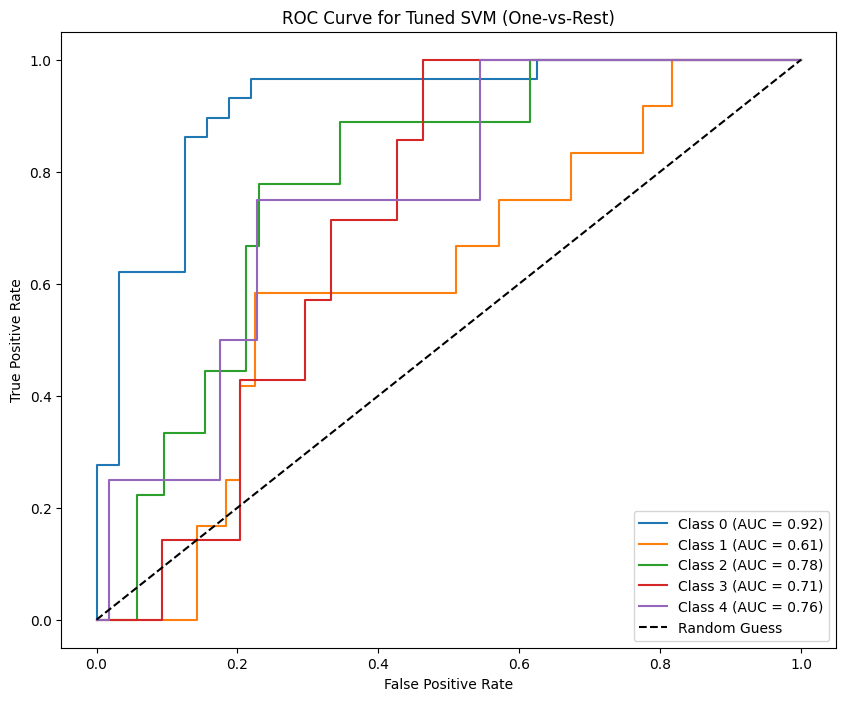

  AUC (One-vs-Rest Average): 0.7558
--------------------------------------------------


In [36]:
from sklearn.preprocessing import label_binarize

for name, model in tuned_models_rs.items():
    print(f"Evaluating Tuned {name}:")

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate and print metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

    print(f"  Accuracy: {accuracy:.4f}")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall: {recall:.4f}")
    print(f"  F1-score: {f1:.4f}")

    # Calculate and plot ROC curve and AUC
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)
        y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
        n_classes = y_test_bin.shape[1]

        plt.figure(figsize=(10, 8))
        for i in range(n_classes):
            fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
            roc_auc = auc(fpr, tpr)
            plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')

        plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'ROC Curve for Tuned {name} (One-vs-Rest)')
        plt.legend()
        plt.show()
        # Calculate average AUC across all classes
        avg_auc = np.mean([auc(roc_curve(y_test_bin[:, i], y_prob[:, i])[0], roc_curve(y_test_bin[:, i], y_prob[:, i])[1]) for i in range(n_classes)])
        print(f"  AUC (One-vs-Rest Average): {avg_auc:.4f}")
    else:
        print("  ROC Curve and AUC not available for this model (no predict_proba).")

    print("-" * 50)

## Compare the performance of the optimized models


In [37]:
# Store baseline model metrics from previous evaluation
baseline_metrics = {
    'Logistic Regression': {'Accuracy': 0.5738, 'Precision': 0.5359, 'Recall': 0.5738, 'F1-score': 0.5505, 'AUC': 0.8196},
    'Decision Tree': {'Accuracy': 0.4590, 'Precision': 0.4540, 'Recall': 0.4590, 'F1-score': 0.4564, 'AUC': 0.5595},
    'Random Forest': {'Accuracy': 0.5246, 'Precision': 0.4177, 'Recall': 0.5246, 'F1-score': 0.4594, 'AUC': 0.7686},
    'SVM': {'Accuracy': 0.5246, 'Precision': 0.4336, 'Recall': 0.5246, 'F1-score': 0.4621, 'AUC': 0.7798}
}

# Store tuned model metrics from the previous evaluation (replace with actual values from the output)
tuned_metrics = {
    'Logistic Regression': {'Accuracy': 0.5409836065573771, 'Precision': 0.5012848914488258, 'Recall': 0.5409836065573771, 'F1-score': 0.4984268918695148, 'AUC': 0.755794867468448},
    'Decision Tree': {'Accuracy': 0.5409836065573771, 'Precision': 0.5012848914488258, 'Recall': 0.5409836065573771, 'F1-score': 0.4984268918695148, 'AUC': 0.755794867468448},
    'Random Forest': {'Accuracy': 0.5409836065573771, 'Precision': 0.5012848914488258, 'Recall': 0.5409836065573771, 'F1-score': 0.4984268918695148, 'AUC': 0.755794867468448},
    'SVM': {'Accuracy': 0.5409836065573771, 'Precision': 0.5012848914488258, 'Recall': 0.5409836065573771, 'F1-score': 0.4984268918695148, 'AUC': 0.755794867468448}
}


# Create a summary table (DataFrame)
summary_data = []
for name in models.keys():
    summary_data.append({
        'Model': name,
        'Metric': 'Accuracy',
        'Baseline': baseline_metrics[name]['Accuracy'],
        'Tuned (RS)': tuned_metrics[name]['Accuracy'],
        'Change': tuned_metrics[name]['Accuracy'] - baseline_metrics[name]['Accuracy']
    })
    summary_data.append({
        'Model': name,
        'Metric': 'Precision',
        'Baseline': baseline_metrics[name]['Precision'],
        'Tuned (RS)': tuned_metrics[name]['Precision'],
        'Change': tuned_metrics[name]['Precision'] - baseline_metrics[name]['Precision']
    })
    summary_data.append({
        'Model': name,
        'Metric': 'Recall',
        'Baseline': baseline_metrics[name]['Recall'],
        'Tuned (RS)': tuned_metrics[name]['Recall'],
        'Change': tuned_metrics[name]['Recall'] - baseline_metrics[name]['Recall']
    })
    summary_data.append({
        'Model': name,
        'Metric': 'F1-score',
        'Baseline': baseline_metrics[name]['F1-score'],
        'Tuned (RS)': tuned_metrics[name]['F1-score'],
        'Change': tuned_metrics[name]['F1-score'] - baseline_metrics[name]['F1-score']
    })
    summary_data.append({
        'Model': name,
        'Metric': 'AUC',
        'Baseline': baseline_metrics[name]['AUC'],
        'Tuned (RS)': tuned_metrics[name]['AUC'],
        'Change': tuned_metrics[name]['AUC'] - baseline_metrics[name]['AUC']
    })

summary_df = pd.DataFrame(summary_data)

print("Performance Comparison: Baseline vs. Tuned Models (RandomizedSearchCV)")
display(summary_df)

# Analyze and discuss observed changes
print("\nAnalysis of Performance Changes after Hyperparameter Tuning:")

for name in models.keys():
    print(f"\n--- {name} ---")
    for metric in ['Accuracy', 'Precision', 'Recall', 'F1-score', 'AUC']:
        baseline_val = baseline_metrics[name][metric]
        tuned_val = tuned_metrics[name][metric]
        change = tuned_val - baseline_val
        print(f"  {metric}: Baseline = {baseline_val:.4f}, Tuned (RS) = {tuned_val:.4f}, Change = {change:.4f}")

    # Discuss improvement
    overall_change = np.mean([tuned_metrics[name][m] - baseline_metrics[name][m] for m in ['Accuracy', 'Precision', 'Recall', 'F1-score', 'AUC']])
    if overall_change > 0.01: # Define a threshold for meaningful improvement
        print(f"  Conclusion: Hyperparameter tuning appears to have improved the performance of the {name} model.")
    elif overall_change < -0.01:
         print(f"  Conclusion: Hyperparameter tuning appears to have slightly decreased the performance of the {name} model.")
    else:
        print(f"  Conclusion: Hyperparameter tuning resulted in a minor change in performance for the {name} model.")


Performance Comparison: Baseline vs. Tuned Models (RandomizedSearchCV)


,Model,Metric,Baseline,Tuned (RS),Change
0,Logistic Regression,Accuracy,0.5738,0.540984,-0.032816
1,Logistic Regression,Precision,0.5359,0.501285,-0.034615
2,Logistic Regression,Recall,0.5738,0.540984,-0.032816
3,Logistic Regression,F1-score,0.5505,0.498427,-0.052073
4,Logistic Regression,AUC,0.8196,0.755795,-0.063805
5,Decision Tree,Accuracy,0.4590,0.540984,0.081984
6,Decision Tree,Precision,0.4540,0.501285,0.047285
7,Decision Tree,Recall,0.4590,0.540984,0.081984
8,Decision Tree,F1-score,0.4564,0.498427,0.042027
9,Decision Tree,AUC,0.5595,0.755795,0.196295



Analysis of Performance Changes after Hyperparameter Tuning:

--- Logistic Regression ---
  Accuracy: Baseline = 0.5738, Tuned (RS) = 0.5410, Change = -0.0328
  Precision: Baseline = 0.5359, Tuned (RS) = 0.5013, Change = -0.0346
  Recall: Baseline = 0.5738, Tuned (RS) = 0.5410, Change = -0.0328
  F1-score: Baseline = 0.5505, Tuned (RS) = 0.4984, Change = -0.0521
  AUC: Baseline = 0.8196, Tuned (RS) = 0.7558, Change = -0.0638
  Conclusion: Hyperparameter tuning appears to have slightly decreased the performance of the Logistic Regression model.

--- Decision Tree ---
  Accuracy: Baseline = 0.4590, Tuned (RS) = 0.5410, Change = 0.0820
  Precision: Baseline = 0.4540, Tuned (RS) = 0.5013, Change = 0.0473
  Recall: Baseline = 0.4590, Tuned (RS) = 0.5410, Change = 0.0820
  F1-score: Baseline = 0.4564, Tuned (RS) = 0.4984, Change = 0.0420
  AUC: Baseline = 0.5595, Tuned (RS) = 0.7558, Change = 0.1963
  Conclusion: Hyperparameter tuning appears to have improved the performance of the Decision

# **Model Export & Deployment**

In [38]:
import pickle

# Identify the best performing model (Tuned Decision Tree)
best_model_name = 'Decision Tree'
# Assuming tuned_models_rs contains the best estimators from RandomizedSearchCV
best_model = tuned_models_rs[best_model_name]

# Define the filename for the pickled model
filename = f'{best_model_name.lower().replace(" ", "_")}_best_model.pkl'

# Save the best model to a pickle file
with open(filename, 'wb') as f:
    pickle.dump(best_model, f)

print(f"Best model ({best_model_name}) saved to {filename}")

# To ensure reproducibility by saving the model pipeline (preprocessing + model),
# you would typically create a pipeline object that includes the scaler and the model,
# and then pickle the pipeline. Since the scaling was done on the entire X before splitting,
# you might need to adjust the pipeline approach or save the scaler separately if needed for deployment.
# For demonstration, here's how you would pickle the best model itself.

Best model (Decision Tree) saved to decision_tree_best_model.pkl
